In interactive notebook, the `spark` object is already created.
Instructors tested with 1 driver, 6 executors of small e4 (24 cores, 192GB memory)

### Launch spark environment

In [1]:
spark

StatementMeta(cf47b043-0c98-4514-b15a-1e3237e3aed3, 23, 6, Finished, Available)

### Set up data configuration

In [2]:
blob_account_name = "marckvnonprodblob"
blob_container_name = "bigdata"
# read only
blob_sas_token = "?sv=2021-10-04&st=2023-10-04T01%3A42%3A59Z&se=2024-01-02T02%3A42%3A00Z&sr=c&sp=rlf&sig=w3CH9MbCOpwO7DtHlrahc7AlRPxSZZb8MOgS6TaXLzI%3D"

wasbs_base_url = (
    f"wasbs://{blob_container_name}@{blob_account_name}.blob.core.windows.net/"
)
spark.conf.set(
    f"fs.azure.sas.{blob_container_name}.{blob_account_name}.blob.core.windows.net",
    blob_sas_token,
)

StatementMeta(cf47b043-0c98-4514-b15a-1e3237e3aed3, 23, 7, Finished, Available)

#### Reading in single parquet file

In [5]:
comments_path = "reddit-parquet/comments/"
submissions_path = "reddit-parquet/submissions/"

StatementMeta(cf47b043-0c98-4514-b15a-1e3237e3aed3, 23, 10, Finished, Available)

In [6]:
# Test on a single file only (random file)
comments_single = "year=2022/month=4/part-33862-938a0446-0942-498f-9083-5319922f1d77.c000.zstd.parquet"
submissions_single = "year=2021/month=7/part-05804-7ec124ef-9f52-4612-a64d-ecd7a1ca868b.c000.zstd.parquet"

StatementMeta(cf47b043-0c98-4514-b15a-1e3237e3aed3, 23, 11, Finished, Available)

In [7]:
comments_single_df = spark.read.parquet(f"{wasbs_base_url}{comments_path}{comments_single}")
submissions_single_df = spark.read.parquet(f"{wasbs_base_url}{submissions_path}{submissions_single}")

StatementMeta(cf47b043-0c98-4514-b15a-1e3237e3aed3, 23, 12, Finished, Available)

#### Initial exploration

- Schema
- Row count

In [6]:
comments_single_df.printSchema()

StatementMeta(cf47b043-0c98-4514-b15a-1e3237e3aed3, 22, 11, Finished, Available)

root
 |-- author: string (nullable = true)
 |-- author_cakeday: boolean (nullable = true)
 |-- author_flair_css_class: string (nullable = true)
 |-- author_flair_text: string (nullable = true)
 |-- body: string (nullable = true)
 |-- can_gild: boolean (nullable = true)
 |-- controversiality: long (nullable = true)
 |-- created_utc: timestamp (nullable = true)
 |-- distinguished: string (nullable = true)
 |-- edited: string (nullable = true)
 |-- gilded: long (nullable = true)
 |-- id: string (nullable = true)
 |-- is_submitter: boolean (nullable = true)
 |-- link_id: string (nullable = true)
 |-- parent_id: string (nullable = true)
 |-- permalink: string (nullable = true)
 |-- retrieved_on: timestamp (nullable = true)
 |-- score: long (nullable = true)
 |-- stickied: boolean (nullable = true)
 |-- subreddit: string (nullable = true)
 |-- subreddit_id: string (nullable = true)



In [7]:
comments_row_count = comments_single_df.count()
comment_col_count = len(comments_single_df.columns)
print(f"shape of the comments dataframe is {comments_row_count:,}x{comment_col_count}")

StatementMeta(cf47b043-0c98-4514-b15a-1e3237e3aed3, 22, 12, Finished, Available)

shape of the comments dataframe is 97,410x21


In [8]:
submissions_single_df.printSchema()



StatementMeta(cf47b043-0c98-4514-b15a-1e3237e3aed3, 22, 13, Finished, Available)

root
 |-- adserver_click_url: string (nullable = true)
 |-- adserver_imp_pixel: string (nullable = true)
 |-- archived: boolean (nullable = true)
 |-- author: string (nullable = true)
 |-- author_cakeday: boolean (nullable = true)
 |-- author_flair_css_class: string (nullable = true)
 |-- author_flair_text: string (nullable = true)
 |-- author_id: string (nullable = true)
 |-- brand_safe: boolean (nullable = true)
 |-- contest_mode: boolean (nullable = true)
 |-- created_utc: timestamp (nullable = true)
 |-- crosspost_parent: string (nullable = true)
 |-- crosspost_parent_list: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- approved_at_utc: string (nullable = true)
 |    |    |-- approved_by: string (nullable = true)
 |    |    |-- archived: boolean (nullable = true)
 |    |    |-- author: string (nullable = true)
 |    |    |-- author_flair_css_class: string (nullable = true)
 |    |    |-- author_flair_text: string (nullable = true)
 |    |    

In [9]:
submissions_row_count = submissions_single_df.count()
submissions_col_count = len(submissions_single_df.columns)
print(f"shape of the submissions dataframe is {submissions_row_count:,}x{submissions_col_count}")

StatementMeta(cf47b043-0c98-4514-b15a-1e3237e3aed3, 22, 14, Finished, Available)

shape of the submissions dataframe is 34,791x68


### Reading in an entire month

In [10]:
# Test on a single month
comments_month = "year=2022/month=4/"
submissions_month = "year=2021/month=7/"

StatementMeta(cf47b043-0c98-4514-b15a-1e3237e3aed3, 22, 15, Finished, Available)

In [11]:
comments_months_df = spark.read.parquet(f"{wasbs_base_url}{comments_path}{comments_month}")
submissions_months_df = spark.read.parquet(f"{wasbs_base_url}{submissions_path}{submissions_month}")

StatementMeta(cf47b043-0c98-4514-b15a-1e3237e3aed3, 22, 16, Finished, Available)

#### Initial exploration

In [12]:
comments_row_count = comments_months_df.count()
comment_col_count = len(comments_months_df.columns)
print(f"shape of the comments dataframe is {comments_row_count:,}x{comment_col_count}")

StatementMeta(cf47b043-0c98-4514-b15a-1e3237e3aed3, 22, 17, Finished, Available)

shape of the comments dataframe is 231,188,077x21


In [13]:
submissions_row_count = submissions_months_df.count()
submissions_col_count = len(submissions_months_df.columns)
print(f"shape of the submissions dataframe is {submissions_row_count:,}x{submissions_col_count}")

StatementMeta(cf47b043-0c98-4514-b15a-1e3237e3aed3, 22, 18, Finished, Available)

shape of the submissions dataframe is 28,900,234x68


### Reeading in all of the Reddit data

In [14]:
comments_df = spark.read.parquet(f"{wasbs_base_url}{comments_path}")
submissions_df = spark.read.parquet(f"{wasbs_base_url}{submissions_path}")

StatementMeta(cf47b043-0c98-4514-b15a-1e3237e3aed3, 22, 19, Finished, Available)

In [15]:
submissions_df.count()

StatementMeta(cf47b043-0c98-4514-b15a-1e3237e3aed3, 22, 20, Finished, Available)

892160821

In [16]:
submissions_df.rdd.getNumPartitions()

StatementMeta(cf47b043-0c98-4514-b15a-1e3237e3aed3, 22, 21, Finished, Available)

3080

In [17]:
comments_df.count()

StatementMeta(cf47b043-0c98-4514-b15a-1e3237e3aed3, 22, 22, Finished, Available)

6114480450

In [18]:
comments_df.rdd.getNumPartitions()

StatementMeta(cf47b043-0c98-4514-b15a-1e3237e3aed3, 22, 23, Finished, Available)

7428

In [19]:
comments_df.printSchema()

StatementMeta(cf47b043-0c98-4514-b15a-1e3237e3aed3, 22, 24, Finished, Available)

root
 |-- author: string (nullable = true)
 |-- author_cakeday: boolean (nullable = true)
 |-- author_flair_css_class: string (nullable = true)
 |-- author_flair_text: string (nullable = true)
 |-- body: string (nullable = true)
 |-- can_gild: boolean (nullable = true)
 |-- controversiality: long (nullable = true)
 |-- created_utc: timestamp (nullable = true)
 |-- distinguished: string (nullable = true)
 |-- edited: string (nullable = true)
 |-- gilded: long (nullable = true)
 |-- id: string (nullable = true)
 |-- is_submitter: boolean (nullable = true)
 |-- link_id: string (nullable = true)
 |-- parent_id: string (nullable = true)
 |-- permalink: string (nullable = true)
 |-- retrieved_on: timestamp (nullable = true)
 |-- score: long (nullable = true)
 |-- stickied: boolean (nullable = true)
 |-- subreddit: string (nullable = true)
 |-- subreddit_id: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)



## Exploratory Data Analysis

Here is an example of some EDA. But, before we do that let us setup some local directory structure so that that the results can be checked in into the repo.

In [3]:
## create a directory called data/plots and data/csv to save generated data
import os
PLOT_DIR = os.path.join("Users/aem303/data", "plots")
CSV_DIR = os.path.join("Users/aem303/data", "csv")
os.makedirs(PLOT_DIR, exist_ok=True)
os.makedirs(CSV_DIR, exist_ok=True)

StatementMeta(cf47b043-0c98-4514-b15a-1e3237e3aed3, 23, 8, Finished, Available)

### How many subreddits are there and which are the more popular ones

One of the first questions we can ask is how many subreddits are there and which ones are the top 10 based on the number of submissions.

In [21]:
from pyspark.sql.functions import col, asc,desc
submissions_by_subreddit = submissions_df.groupBy("subreddit").count().orderBy(col("count"), ascending=False).collect()

StatementMeta(cf47b043-0c98-4514-b15a-1e3237e3aed3, 22, 26, Finished, Available)

In [22]:
submissions_by_subreddit

StatementMeta(cf47b043-0c98-4514-b15a-1e3237e3aed3, 22, 27, Finished, Available)

[Row(subreddit='AskReddit', count=8502376),
 Row(subreddit='FreeKarma4U', count=4762030),
 Row(subreddit='dirtykikpals', count=4301872),
 Row(subreddit='GaySnapchat', count=3872262),
 Row(subreddit='dirtyr4r', count=3674829),
 Row(subreddit='memes', count=3107784),
 Row(subreddit='teenagers', count=3091696),
 Row(subreddit='jerkbudss', count=2484553),
 Row(subreddit='DirtySnapchat', count=2482436),
 Row(subreddit='AutoNewspaper', count=2247654),
 Row(subreddit='onlyfansgirls101', count=2156848),
 Row(subreddit='u_toronto_news', count=1918873),
 Row(subreddit='relationship_advice', count=1872758),
 Row(subreddit='MassiveCock', count=1810820),
 Row(subreddit='gonewild', count=1797077),
 Row(subreddit='dirtypenpals', count=1717879),
 Row(subreddit='wallstreetbets', count=1698103),
 Row(subreddit='cock', count=1665404),
 Row(subreddit='PokemonGoRaids', count=1657040),
 Row(subreddit='OnlyFansPromotions', count=1600455),
 Row(subreddit='FemBoys', count=1587264),
 Row(subreddit='PokemonGoFri

In [23]:
top_n = 10
top_n_subreddits = spark.createDataFrame(submissions_by_subreddit[:top_n]).toPandas()
top_n_subreddits

StatementMeta(cf47b043-0c98-4514-b15a-1e3237e3aed3, 22, 28, Finished, Available)

,subreddit,count
0,AskReddit,8502376
1,FreeKarma4U,4762030
2,dirtykikpals,4301872
3,GaySnapchat,3872262
4,dirtyr4r,3674829
5,memes,3107784
6,teenagers,3091696
7,jerkbudss,2484553
8,DirtySnapchat,2482436
9,AutoNewspaper,2247654


## Plot a bar chart for the top 10 most popular by submission count

StatementMeta(cf47b043-0c98-4514-b15a-1e3237e3aed3, 22, 29, Finished, Available)

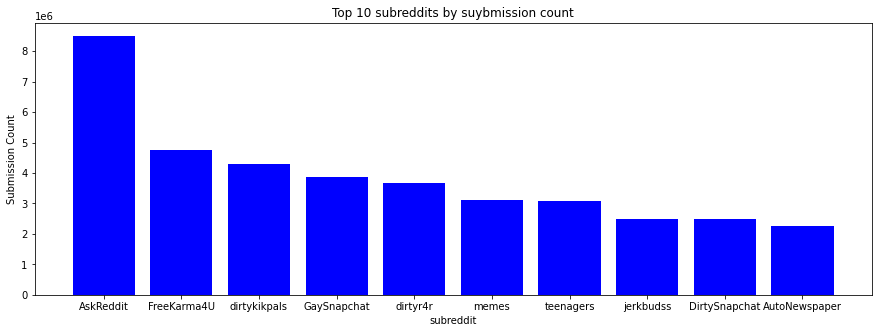

In [24]:
## Import data visualization packages
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]
plt.bar("subreddit", "count", data = top_n_subreddits, color = "blue")
plt.xlabel("subreddit")
plt.ylabel("Submission Count")
plt.title(f"Top {top_n} subreddits by suybmission count")

## Save the plot in the plot dir so that it can be checked in into the repo
plot_fpath = os.path.join(PLOT_DIR, f'top_{top_n}_subreddits.png')

plt.savefig(plot_fpath)
plt.show()

## Saving data to Azure Storage

Sometimes we may want to save intermediate data, especially if it is big and took a significant time to generate, in DBFS. The following code shows an example of this. We save submissions on the `memes` subreddit into dbfs so that we can read from it at a later stage.


In [25]:
submissions_filtered = submissions_df.filter(submissions_df.subreddit == "memes")

StatementMeta(cf47b043-0c98-4514-b15a-1e3237e3aed3, 22, 30, Finished, Available)

In [26]:
submissions_filtered.show()

StatementMeta(cf47b043-0c98-4514-b15a-1e3237e3aed3, 22, 31, Finished, Available)

+------------------+------------------+--------+--------------------+--------------+----------------------+-----------------+---------+----------+------------+-------------------+----------------+---------------------+----------------+-------------+-----------+---------------+------+----------+---------+------+------+----------+--------+-------+---------+----------------+----------------------+-------+--------+--------------------+--------------------+------+--------------------+--------------------+-------------+------------+--------------+-------------+-------+-----------------------+--------------------+------+---------+--------------------+--------+-----------+---------------------+------------+-------------------+-----+------------------+--------------------+---------+-------+--------+---------+------------+--------------+--------------------+--------------------+----------------------+--------------------+----------------+---------------+--------------------+--------------------+

In [32]:
# this code saves the data as a csv just for illustration, use parquet for faster analytics operations.
df_save = submissions_filtered.limit(1000).select("author_id", "title", "selftext").cache()

StatementMeta(cf47b043-0c98-4514-b15a-1e3237e3aed3, 22, 37, Finished, Available)

In [35]:
df_save.write.csv(f"{CSV_DIR}/memes_data.csv")

StatementMeta(cf47b043-0c98-4514-b15a-1e3237e3aed3, 22, 40, Submitted, Running)

In [4]:
memes = spark.read.parquet(f"{CSV_DIR}/memes.parquet")
memes.show()

StatementMeta(cf47b043-0c98-4514-b15a-1e3237e3aed3, 23, 9, Finished, Available)

AnalysisException: Path does not exist: wasbs://3eb31707-ae17-47f8-a542-c32c8eb0808c@hobostoragebvnew0jqf3.blob.core.windows.net/user/trusted-service-user/Users/aem303/data/csv/memes.parquet

### Saving intermediate data

The intermediate outputs go into the azureml workspace attached storage using the URI `azureml://datastores/workspaceblobstore/paths/<PATH-TO_STORE>` this is the same for all workspaces. Then to re-load you use the same URI

In [8]:
datastore = 'azureml://datastores/workspaceblobstore/paths'
comments_single_df.write.parquet(f"{datastore}/memes.parquet")

StatementMeta(cf47b043-0c98-4514-b15a-1e3237e3aed3, 23, 13, Finished, Available)

In [9]:
comments_single_df_load = spark.read.parquet(f"{datastore}/memes.parquet")

StatementMeta(cf47b043-0c98-4514-b15a-1e3237e3aed3, 23, 14, Finished, Available)

In [11]:
print(f'data saved {comments_single_df.count()} - {len(comments_single_df.columns)}')
print(f'data loaded {comments_single_df_load.count()} - {len(comments_single_df_load.columns)}')

StatementMeta(cf47b043-0c98-4514-b15a-1e3237e3aed3, 23, 16, Finished, Available)

data saved 97410 - 21
data loaded 97410 - 21
